<h2>Table of Contents</h2>
<p>In this lab, you will train a model with PyTorch by using data that you created. The model only has one parameter: the slope.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train">Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>20 min</strong></p>

<hr>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [3]:
# the class for plotting
class plot_diagram():
  #constructor
  def __init__(self,X,Y,w,stop,go=False):
    start = w.data
    self.error = []
    self.parameter = []
    self.X = X.numpy()
    self.Y = Y.numpy()
    self.parameter_values = torch.arange(start, stop)
    self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
    w.data = start
   # Executor
  def __call__(self, Yhat, w, error, n):
      self.error.append(error)
      self.parameter.append(w.data)
      plt.subplot(212)
      plt.plot(self.X, Yhat.detach().numpy())
      plt.plot(self.X, self.Y,'ro')
      plt.xlabel("A")
      plt.ylim(-20, 20)
      plt.subplot(211)
      plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
      plt.plot(self.parameter_values.numpy(), self.Loss_function)   
      plt.plot(self.parameter, self.error, 'ro')
      plt.xlabel("B")
      plt.figure()
  
  # Destructor
  def __del__(self):
      plt.close('all')

## Make some data

In [5]:
import torch

In [6]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

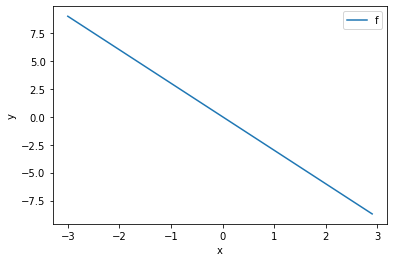

In [7]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.


In [9]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

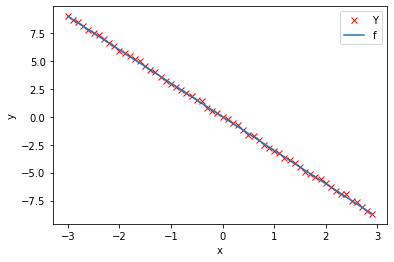

In [10]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Create the Model and Cost Function (Total Loss)

In [11]:
def forward(x):
  return w*x
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [12]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [13]:
w = torch.tensor(-10.0, requires_grad = True)

In [15]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

## Train the Model

In [16]:
def train_model(iter):
  for epoch in range(iter):
    # make the prediction as we learned in the last lab
    Yhat = forward(X)
    
    # calculate the iteration
    loss = criterion(Yhat,Y)
    
    # plot the diagram for us to have a better idea
    gradient_plot(Yhat, w, loss.item(), epoch)

    # store the loss into list
    LOSS.append(loss.item())
    
    # backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    
    # updata parameters
    w.data = w.data - lr * w.grad.data
    
    # zero the gradients before running the backward pass
    w.grad.data.zero_()

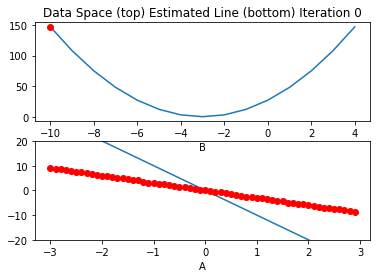

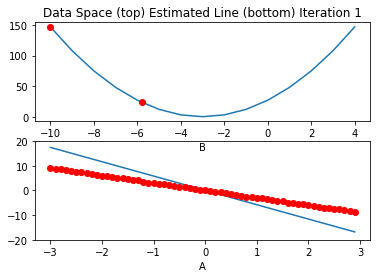

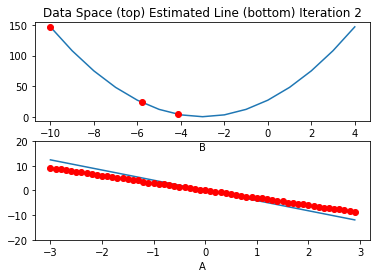

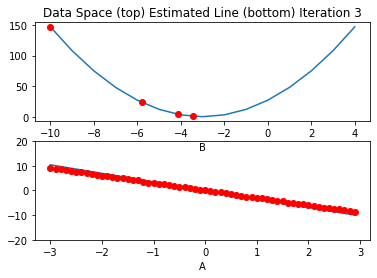

<Figure size 432x288 with 0 Axes>

In [17]:
# Give 4 iterations for training the model here.

train_model(4)

Text(24.0, 0.5, 'Cost')

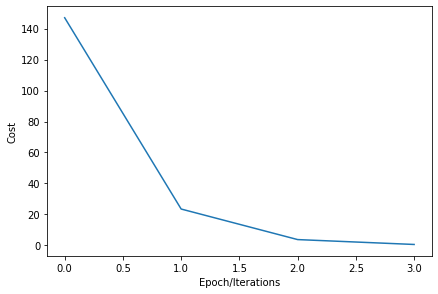

In [18]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

## Practice
Create a new learnable parameter <code>w</code> with an initial value of -15.0.


In [36]:
w =torch.tensor(-15.0,requires_grad=True)

In [37]:
gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

In [38]:
LOSS2=[]

In [39]:
def my_train(iter):
  for epoch in range(iter):
    Yhat=forward(X)
    loss=criterion(Yhat,Y)
    gradient_plot1(Yhat,w,loss.item(),epoch)
    LOSS2.append(loss)
    loss.backward()
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()

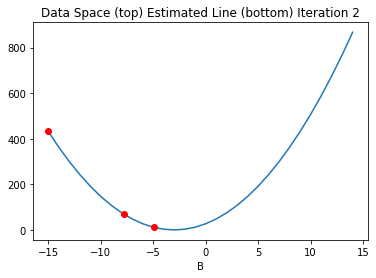

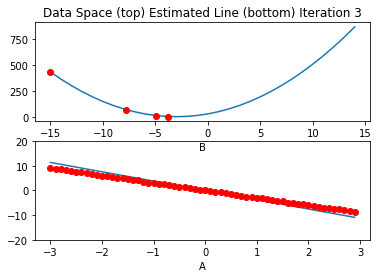

<Figure size 432x288 with 0 Axes>

In [40]:
my_train(4)

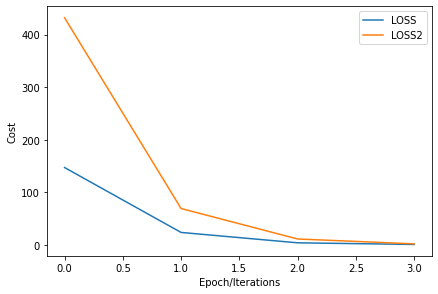

In [41]:
plt.plot(LOSS,label="LOSS")
plt.plot(LOSS2,label="LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

## the parameter value is sensitive to initialization  